In [47]:
import os, fnmatch 
import mesaPlot as mp
import numpy as np
import astropy.units as u
import astropy.constants as c 
import mesa_reader as mr

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from ipywidgets import FloatProgress
from IPython.display import display, clear_output

mesa_dir = '/Users/janton/mesa-r10398/' 
work_dir = '/Users/janton/mesa-r10398/star/test_suite/HeliumCores2/'
plot_results_dir = '/Users/janton/Desktop'

def find(pattern,path):
    result = []
    for root,dirs,files in os.walk(path):
        for name in files:
            if fnmatch.fnmatch(name,pattern):
                result.append(os.path.join(root,name))
    return result

def prepare_canvas(loc='lower left'):
    plt.rcParams['figure.figsize'] = [20, 12]
    plt.rcParams['axes.linewidth'] = 2.5
    plt.legend(prop={'size': 15},loc=loc)
    
    fontsize = 20
    ax = plt.gca()
    ax.tick_params(direction='in',length=12,top=True,right=True)
    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize)
        #tick.label1.set_fontweight('bold')
    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize)
        #tick.label1.set_fontweight('bold')
    plt.locator_params(nbins=12)
    
def capture_density(t,rho_0,Q,t_comp,ft):
    rho = rho_0/(1 + (3*c.k_B*t/Q)* np.log(2*np.log(2)*(c.k_B*t/(c.m_e*c.c**2))**5 * (Q/(c.k_B*t))**2 * (t_comp/ft)))
    return rho 

def nse_boundary(rho,T,s=1.0):
    rho = 10**rho
    T = (10**T)/1e9
    logrho = -(np.log10(np.exp(179./T - 40.5))-np.log10(s))/0.2
    return logrho
    
def logrhoc_logTc(data,
                  labels,
                  mesa_dir = mesa_dir, 
                  colors=None,
                  lstyle=None,
                  xlim=None,
                  ylim=None,
                  ecap_density_corrections=False,
                  t_comp=1e4*u.yr):
    
    
 #   hydrogen_burning_line = os.path.join(mesa_dir,'data/star_data/plot_info/hydrogen_burn.data')
    helium_burning_line = os.path.join(mesa_dir,'data/star_data/plot_info/helium_burn.data')
    carbon_burning_line = os.path.join(mesa_dir,'data/star_data/plot_info/carbon_burn.data')
    oxygen_burning_line = os.path.join(mesa_dir,'data/star_data/plot_info/oxygen_burn.data')
    electron_degeneracy_line = os.path.join(mesa_dir,'data/star_data/plot_info/psi4.data')
    
    
 #   hburn = np.genfromtxt(hydrogen_burning_line)
    heburn = np.genfromtxt(helium_burning_line)
    cburn = np.genfromtxt(carbon_burning_line)
    oburn = np.genfromtxt(oxygen_burning_line)
    electron = np.genfromtxt(electron_degeneracy_line)

    # Radiation pressure line 
    logrho = np.arange(-9.0,10.0,0.1)
    logt = np.log10(3.2e7) + (logrho - np.log10(0.7))/3.0
    
    rhonse = nse_boundary(logrho,logt,s=1)
    plt.plot(rhonse,logt,ls=':',color='black')
    plt.text(5.1, 9.7, 'NSE', fontsize=20,
               rotation=0, rotation_mode='anchor')


    plt.plot(heburn[:,0],heburn[:,1],ls=':',color='black')
    plt.text(5.1, 7.95, 'He burn', fontsize=20,
               rotation=0, rotation_mode='anchor')


    plt.plot(cburn[:,0],cburn[:,1],ls=':',color='black')
    plt.text(5.1, 8.67, 'C burn', fontsize=20,
               rotation=0, rotation_mode='anchor')


    plt.plot(oburn[:,0],oburn[:,1],ls=':',color='black')
    plt.text(5.1, 9.05, 'O burn', fontsize=20,
               rotation=0, rotation_mode='anchor')

    plt.plot(electron[:,0],electron[:,1],ls='--',color='black')

   # plt.plot(logrho,logt,ls='--',color='black')
    plt.text(6.98, 9.5, r'$\epsilon_{\rm F}/k T \simeq 4$', fontsize=20, rotation=0, rotation_mode='anchor')
    
  #  plt.text(5.1, 9.5, r'$P_{\rm rad}\simeq P_{\rm gas}$', fontsize=20, rotation=0, rotation_mode='anchor')
    

    #Weak reaction lines 
    plt.text(9.05, 7.52, r'$^{25}{\rm Mg}\leftrightarrow ^{25}{\rm Na}$', fontsize=18, rotation=90,verticalalignment='bottom')
    plt.text(9.25, 7.52, r'$^{23}{\rm Na} \leftrightarrow ^{23}{\rm Ne}$', fontsize=18, rotation=90,verticalalignment='bottom')
    plt.text(9.65, 7.52, r'$^{24}{\rm Mg}\rightarrow ^{24}{\rm Na}$', fontsize=18, rotation=90,verticalalignment='bottom')
    plt.text(9.75, 7.52, r'$^{24}{\rm Na}\rightarrow ^{24}{\rm Ne}$', fontsize=18, rotation=90,verticalalignment='bottom')
    plt.text(9.85, 7.52, r'$^{25}{\rm Na}\leftrightarrow ^{25}{\rm Ne}$', fontsize=18, rotation=90,verticalalignment='bottom')
    plt.text(10.00, 7.52, r'$^{20}{\rm Ne}\rightarrow ^{20}{\rm F}\rightarrow  ^{20}{\rm O}$', fontsize=15, rotation=90,color='black',verticalalignment='bottom')
    
    
    if ecap_density_corrections:
        t = np.arange(7.5,11,0.1)
        t = 10**t * u.K
        rho_ce = capture_density(t,10**9.96,7.025*u.MeV,t_comp,10**9.801*u.s)
        plt.plot(np.log10(rho_ce),np.log10(t.value),color='red',ls='--')
    else:
        #plt.axvline(x=9.96,color='gray',ls='--')
        plt.fill_between([9.96,13],0,15,facecolor="none", hatch="....", edgecolor="gray", linewidth=0.0)
        
        plt.text(10.2, 9.05, r'ECSNe', 
                {'color': 'black', 'ha': 'center', 'va': 'center','fontsize': 20,'bbox': dict(boxstyle="round", fc="w", ec="k", pad=0.2)})
        
    #plt.axvline(x=9.954,color='red',ls='-')

   # plt.text(10.0, 8.3, r'$e^{-}$cSN', fontsize=15, rotation=90,color='red',verticalalignment='bottom')
    
   # now loop over data 
    for i in range(len(data)):
        d = data[i]
        if lstyle !=None:
            ls = lstyle[i]
        else:
            ls = '-'
        if colors !=None:
            color = colors[i]
        else:
            color=np.random.rand(3,1)
        if i==2:
            plt.plot(d('log_center_Rho')[:-25],d('log_center_T')[:-25],label=labels[i],color=color,ls=ls)
        else:
            plt.plot(d('log_center_Rho'),d('log_center_T'),label=labels[i],color=color,ls=ls)
        
    
    #frame & labels 
    xlabel = r'$\log (\rho_{\rm c} / {\rm g}\,{\rm cm}^{-3})$'
    ylabel = r'$\log (T_{\rm c} / {\rm K})$'
    plt.xlabel(xlabel,fontsize=22)
    plt.ylabel(ylabel,fontsize=22) 
    
    if xlim:
        plt.xlim(xlim)
    else:
        plt.xlim([5,10.5])
    if ylim:
        plt.ylim(ylim)
    else:
        plt.ylim([7.5,10.0])
        
    
    prepare_canvas(loc='upper right')
    plt.savefig(os.path.join(plot_results_dir,'Rhoc_vs_Tc.pdf'))
    plt.show()
    

    
    
def mdot_vs_mass(data,labels):

    for i in range(len(data)):
        d = data[i]
        plt.plot(d('star_mass'),d('log_abs_mdot'),label=labels[i])

    
    xlabel = r'Mass [M$_{\odot}]$'
    ylabel = r'$\dot{M}\,{\rm [ M}_{\odot}\,{\rm yr}^{-1}$]'
    plt.xlabel(xlabel,fontsize=22)
    plt.ylabel(ylabel,fontsize=22) 
    
    prepare_canvas()
    plt.ylim([-12,3.0])
    plt.savefig(os.path.join(plot_results_dir,'mdot_vs_m.pdf'))
    plt.show()
    
    
    
def mdot_vs_teff(data,labels):

    for i in range(len(data)):
        d = data[i]
        plt.plot(d('log_Teff'),d('log_abs_mdot'),label=labels[i])

    
    xlabel = r'$\log\,$T$_{\rm eff}$'
    ylabel = r'$\dot{M}\,{\rm [ M}_{\odot}\,{\rm yr}^{-1}$]'
    plt.xlabel(xlabel,fontsize=22)
    plt.ylabel(ylabel,fontsize=22) 
    
    prepare_canvas()
    plt.ylim([-12,3.0])
    plt.xlim([6,3.0])
  #  plt.savefig(os.path.join(plot_results_dir,'mdot_vs_m.pdf'))
    plt.show()
    
    
def hr(data,labels):
    xlabel = r'log Teff [Kelvin]'
    ylabel = r'log Luminosity'
    plt.xlabel(xlabel,fontsize=22)
    plt.ylabel(ylabel,fontsize=22) 
       
    for i in range(len(data)):
        d = data[i]
        he = d('log_LHe')
        filt = np.where(he>1)
        filt = filt[0][0]
        plt.plot(d('log_Teff')[filt:],d('log_L')[filt:],label=labels[i])
    prepare_canvas()
    plt.xlim([5,3.5])
    plt.savefig(os.path.join(plot_results_dir,'hr.pdf'))
    plt.show()



def potential_energy(rad,rho):
    udr = c.G*16./3. * np.pi**2. *rho**2 * rad**4 
    return np.trapz(udr,rad).to(u.erg)


def total_energy(Et,mass):
    Et = Et*u.erg/u.gram 
    mass = (mass*u.Msun)
    
    return (Et*mass).sum().to(u.erg)

def nuc_energy(A1,A2,mu1,mu2,X,mtot):
     # A1 -> A2 + energy
    energy_per_reaction = ((A2*mu1 - A1*mu2)*u.mu*c.c**2).to(u.erg)
    reactions_per_gram = (1*u.g / (A2*mu1*u.mu)).to(u.dimensionless_unscaled)/u.g
    mtot = u.Quantity(mtot,u.Msun)
    return (energy_per_reaction*reactions_per_gram *(X*mtot)).to(u.erg)


def kinetic_energy(p,Xige,Xime,Xfe=0.2):
    mass = p('dq')*p('mass')[0]
    Mige = p('mass')[0]*Xige
    Mime = p('mass')[0]*Xime
    c12  = 12.00000
    o16  = 15.994915
    ne20 = 19.992440
    na23 = 22.989769
    mg24 = 23.985042
    si28 = 27.976927
    fe56 = 55.934937
    ni56 = 55.942129
    
    E = 0.0
    msum = 0.0
    i=0
    for m in mass[::-1]:
        if msum <= Mige:
            E += nuc_energy(12,56,c12,ni56,p('c12')[::-1][i]*(1-Xfe),m)
            E += nuc_energy(12,56,c12,fe56,p('c12')[::-1][i]*Xfe,m)
            E += nuc_energy(16,56,o16,ni56,p('o16')[::-1][i]*(1-Xfe),m)
            E += nuc_energy(16,56,o16,fe56,p('o16')[::-1][i]*Xfe,m)   
            E += nuc_energy(20,56,ne20,ni56,p('ne20')[::-1][i]*(1-Xfe),m)
            E += nuc_energy(20,56,ne20,fe56,p('ne20')[::-1][i]*Xfe,m) 
            E += nuc_energy(23,56,na23,ni56,p('na23')[::-1][i]*(1-Xfe),m)
            E += nuc_energy(23,56,na23,fe56,p('na23')[::-1][i]*Xfe,m) 
            E += nuc_energy(24,56,mg24,ni56,p('mg24')[::-1][i]*(1-Xfe),m)
            E += nuc_energy(24,56,mg24,fe56,p('mg24')[::-1][i]*Xfe,m) 

        elif ((msum > Mige) & (msum <= (Mige+ Mime))):
            E += nuc_energy(12,28,c12,si28,p('c12')[::-1][i],m)
            E += nuc_energy(16,28,o16,si28,p('o16')[::-1][i],m)
            E += nuc_energy(20,28,ne20,si28,p('ne20')[::-1][i],m)
            E += nuc_energy(23,28,na23,si28,p('na23')[::-1][i],m)
            E += nuc_energy(24,28,mg24,si28,p('mg24')[::-1][i],m)
        i+=1
        msum += m 
    Eint=(p('total_energy')*mass* u.erg/u.gram * u.Msun).sum().to(u.erg)
    return E,Eint,E+Eint 

## Data to plot 

In [49]:

os.path.join(work_dir,'/LOGS/history.data')




data = [#mr.MesaData(os.path.join(work_dir,'results/z001/2p2_urca/LOGS/history.data')).data,
        #mr.MesaData(os.path.join(work_dir,'results/z001/2p3_urca/LOGS/history.data')).data,
        #mr.MesaData(os.path.join(work_dir,'results/z001/2p4_urca/LOGS/history.data')).data,
        #mr.MesaData(os.path.join(work_dir,'results/z001/2p5_urca/LOGS/history.data')).data,
        mr.MesaData(os.path.join(work_dir,'results/paper/history_2.5000_0.0200_0.0000.data')).data,
        mr.MesaData(os.path.join(work_dir,'results/paper/history_1.8000_0.0200_0.0140.data')).data,
        mr.MesaData(os.path.join(work_dir,'results/paper/history_2.5000_0.0200_0.0000_no_carb.data')).data,
        mr.MesaData(os.path.join(work_dir,'results/paper/history_1.8000_0.0200_0.0000.data')).data

        #mr.MesaData(os.path.join(work_dir,'LOGS/history.data')).data,
       # mr.MesaData('/Users/janton/mesa-r10398/binary/test_suite/helium_star_plus_point_mass/LOGS1/history.data').data
    ]
        
labels = [#r'2.2 M$_{\odot}$',
          #r'2.3 M$_{\odot}$',
          r'$M1$: 2.5 M$_{\odot}$; $Z=0.02$, $f_{\rm OV}=0.0$',
          r'$M2$: 1.8 M$_{\odot}$; $Z=0.02$, $f_{\rm OV}=0.014$',
          r'$M1b $: 2.5 M$_{\odot}$; $Z=0.02$, $f_{\rm OV}=0.0$; no carbon reactions',
          r'$M2b $: 1.8 M$_{\odot}$; $Z=0.02$, $f_{\rm OV}=0.0$'
          #r'2.6 M$_{\odot}$',
          #r'2.3 M$_{\odot}$  test',
          #r'2.4 M$_{\odot}$ P$_{\rm b}=150\,$d'
    ]

colors = ['blue','orange','blue','orange']
lstyle = ['-','-','--','--'] 



TypeError: data() missing 1 required positional argument: 'key'

### $\log \rho_{\rm c}$ vs $\log T_{\rm c}$

No handles with labels found to put in legend.


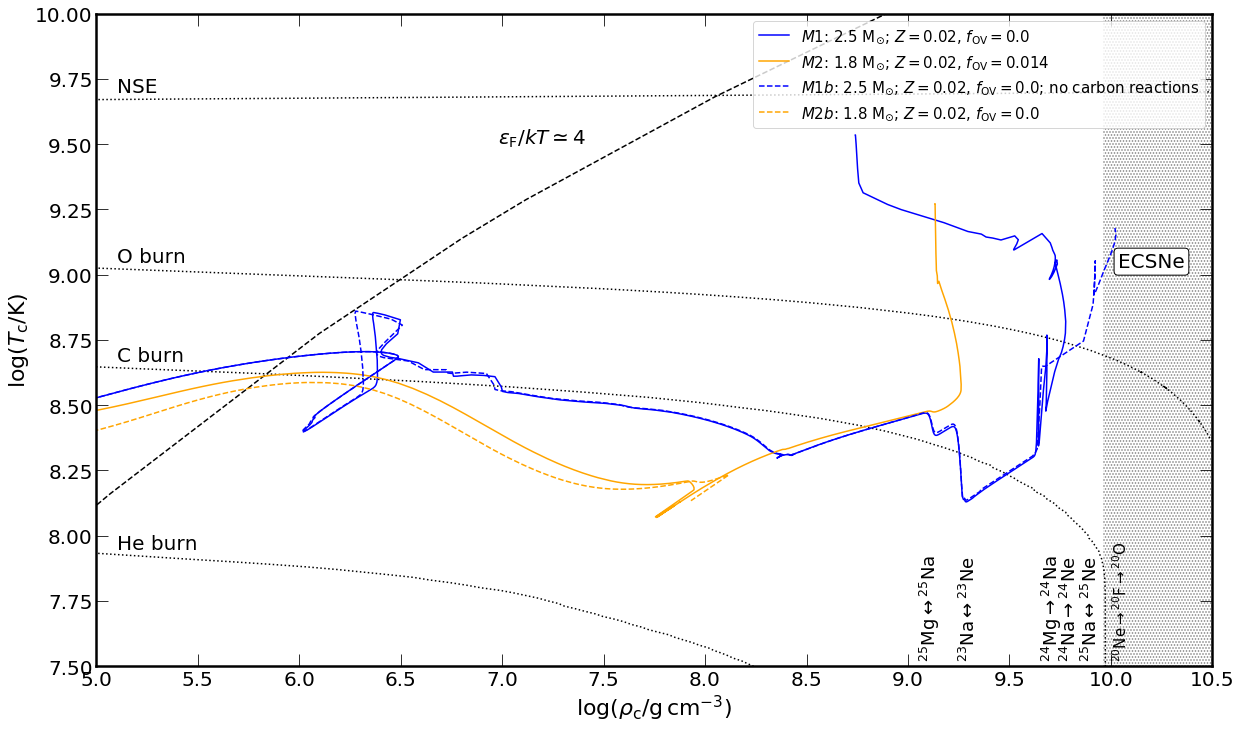

In [46]:
prepare_canvas()
logrhoc_logTc(data,labels,colors=colors,lstyle=lstyle)







## Wind 

No handles with labels found to put in legend.


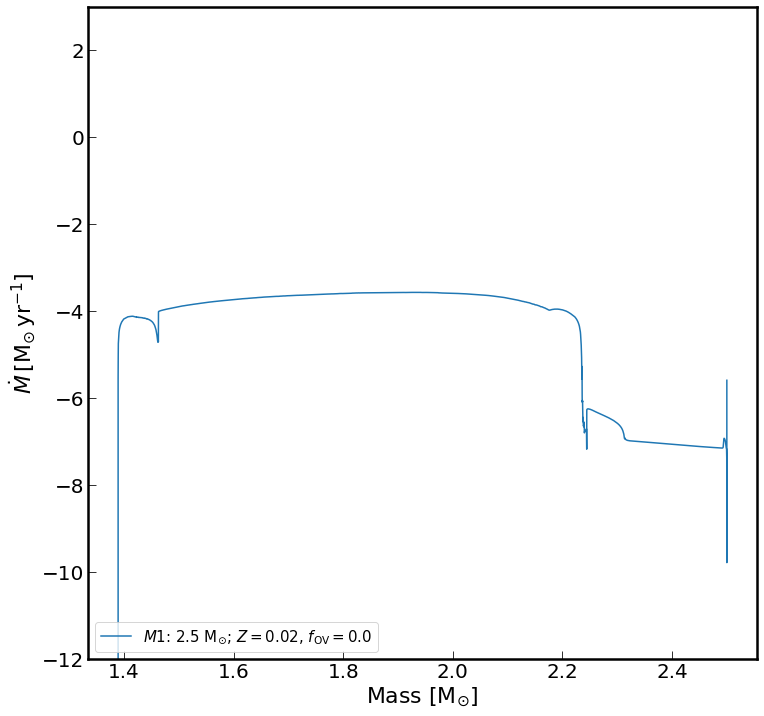

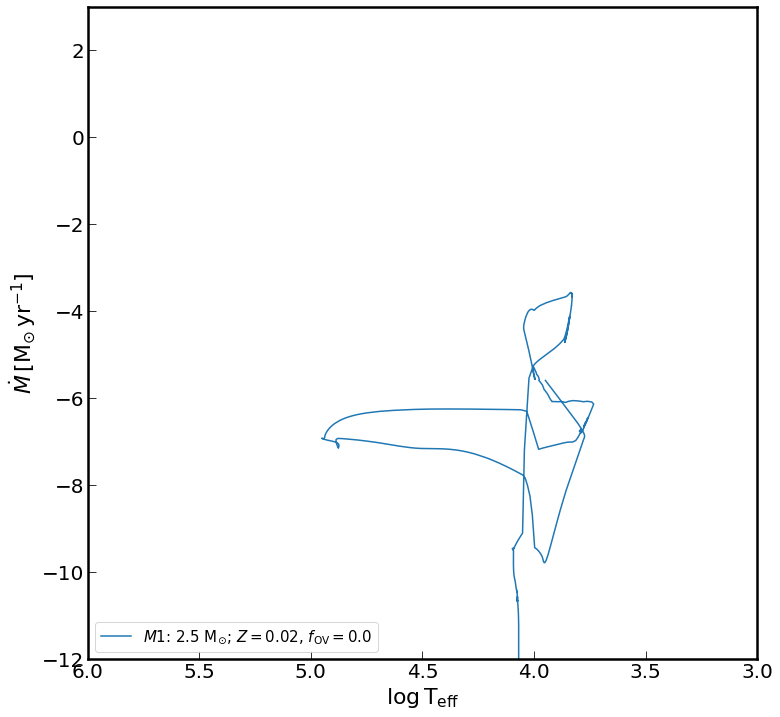

In [48]:
prepare_canvas()
mdot_vs_mass(data,labels)
mdot_vs_teff(data,labels)









## HR diagram 

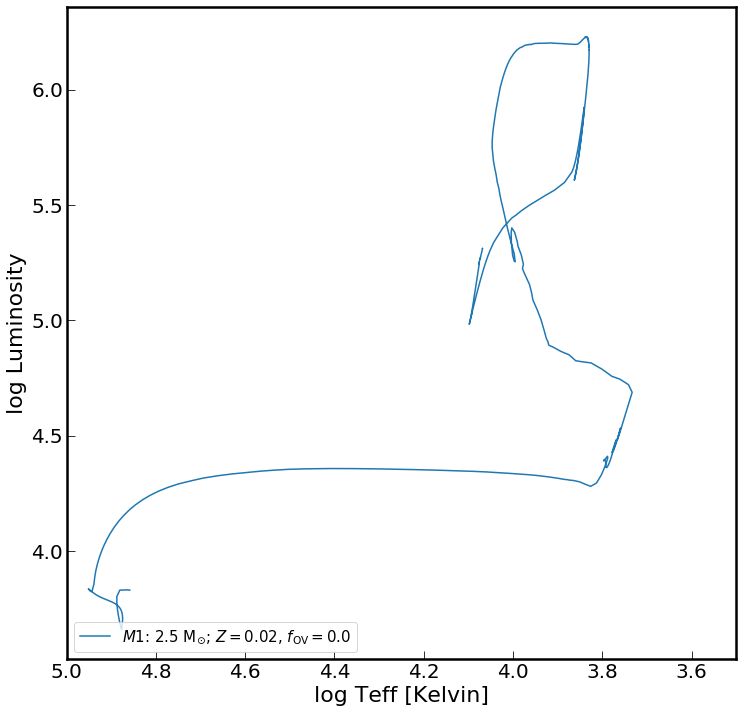

In [49]:
hr(data,labels)

### Energetics

No handles with labels found to put in legend.


9.262186224095915
0.49942533119743804
1.3694300729803426


<Quantity 1.7e-05 solMass / yr>

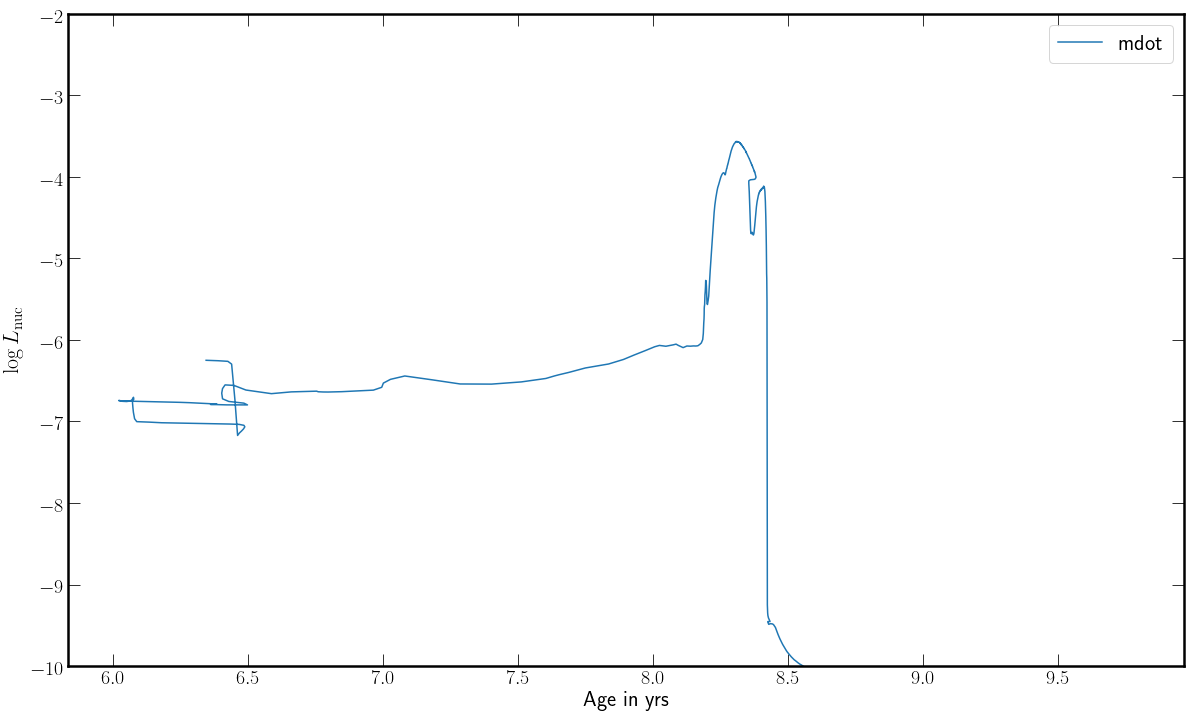

In [47]:
final_profile = mr.MesaData(os.path.join(work_dir,'results/paper/1.8_0.02_0.014_maxRho_profile.data')).data
history = data[0]
history2 = data[1]
mass = final_profile('dq')*final_profile('mass')[0]
print(history2('log_center_Rho').max())
print((final_profile('ye')*mass).sum()/mass.sum())

#histories = find('history.data',os.path.join(work_dir,'results/z001/2p2_urca'))

#for history in histories:
#    data = mr.MesaData(history).data
#    eddington_he = 6.4e4*data('star_mass') 
#    #filt = np.where(10**data('log_L')/eddington_he>1)
#    filt = np.where(data('log_L')>0.2e6)
#    plt.plot((data('star_age'))[filt]-(data('star_age'))[filt][0],(data('log_L'))[filt])


#G = potential_energy(final_profile('radius')*u.Rsun,10**final_profile('logRho')*u.gram/u.cm**3)


#print(G)
print(final_profile('mass')[0])
filt = np.where(final_profile('mass')<1.42)
filt2 = np.where(history('star_age')>2370000)
filt3 = np.where(history2('star_age')>5015000)

prepare_canvas()
plt.plot(history('log_center_Rho')[filt2],history('log_abs_mdot')[filt2],label='mdot')
#plt.plot(history('star_age')[filt2]-2370000,history('log_L')[filt2],label='Surface Luminosity')
plt.xlabel('Age in yrs',fontsize=22)
plt.ylabel(r'$\log L_{\rm nuc}$',fontsize=22)
plt.legend(fontsize=22)

plt.ylim([-10,-2])
#plt.xlim([2370000,2420000])
(2.25-1.4)*u.Msun/((2420000-2370000)*u.yr)

#plt.savefig(os.path.join(plot_results_dir,'SNIa_stuff/luminosity_vs_time.pdf'))


Thus, in principle $E_{\rm nuc} > E_{\rm bind}$

In [1]:
import nugridpy.mesa as mes 




#m1.loadHistory(filename_in=os.path.join(work_dir,'results/paper/history_2.5000_0.0200_0.0000.data'))
#m2.loadHistory(filename_in=os.path.join(work_dir,'results/paper/history_1.8000_0.0200_0.0140.data'))

#m1= mes.history_data(sldir=os.path.join(work_dir,'results/paper'),slname='history_2.5000_0.0200_0.0000.data',)
#m2= mes.history_data(sldir=os.path.join(work_dir,'results/paper'),slname='history_1.8000_0.0200_0.0140.data')
#m1.kip_cont(ixaxis='age',xlims=[2.36,2.42335],ylims=[0.,2.4,],yres=12000,boundaries=False,c12_boundary=True,CBM=True,outfile='/Users/janton/Desktop/kip1.pdf')
#m2.kip_cont(ixaxis='age',xlims=[5.,5.0355],ylims=[0.,1.65,],yres=12000,boundaries=False,c12_boundary=True,CBM=True,outfile='/Users/janton/Desktop/kip2.pdf')

m1.kippenhahn_CO(num_frame=0,xax='time')
#,xaxis='star_age',age_lookback=True,age_log=True
#OrRd
#m.loadProfile(num=16000)
#p.plotAbun(m)

Duplicate key in file '/Users/janton/.matplotlib/matplotlibrc' line #489.


NameError: name 'm1' is not defined

In [12]:
def nsystems(mmin=7.0,mmax=11.0,qmin=0.0,qmax=1.0,alpha=-2.35,kappa=-0.1):
        return ((mmin**(alpha+1.) - mmax**(alpha+1))*(qmin**(kappa+1) -qmax**(kappa+1)))/((alpha+1)*(kappa+1))


    
def salpeter(mass,xi=1,alpha=-2.35):
    return xi*mass**alpha 


def stars_per_unit_mass2(m1,m2,ma=0.125,mb=125,a=2.35):
    frac = (2-a)/(1-a)
    return frac*(m1**(1-a) - m2**(1-a))/(ma**(2-a) - mb**(2-a)) 


def chabrier(mass,xi=1,alpha=-2.35):
    result = np.zeros_like(mass)
    filt = np.where(mass < 1.)
    result[filt] = 0.086*(1/(np.log(10)*mass[filt]))*np.exp(-(np.log10(mass[filt]) -np.log10(0.22))**2. / (2*0.57**2))
    filt2 = np.where(mass >= 1.)
    result[filt2] = 0.019199*mass[filt2]**alpha 
    return result
    
def stars_per_solar_mass(min_mass,max_mass,ma=0.1,mb=125,xi=1.,alpha=-2.35,imf=salpeter):
    mass = np.arange(min_mass,max_mass+1e-9,0.001)
    mass_tot = np.arange(ma,mb+1e-9,0.001)
    N = np.trapz(imf(mass,xi=xi,alpha=alpha),mass)
    Mtot = np.trapz(imf(mass_tot,xi=xi,alpha=alpha)*mass_tot,mass_tot)
    return N/Mtot
    
def random_power_law(a, b, p, size=1):
    g = p+1 
    """Power-law gen for pdf(x)\propto x^{g-1} for a<=x<=b"""
    r = np.random.random(size=size)
    ag, bg = a**g, b**g
    return (ag + (bg - ag)*r)**(1./g)

def rates_plot():
    m1 = np.arange(0.1,100.0,0.1)
    q  = np.arange(0.0,1.001,0.01)
    m2 = np.arange(0.1,100,0.1) 

    #plt.plot(m1,m1,color='black')
    plt.xlabel(r'Primary Mass')
    plt.ylabel(r'Secondary Mass')
    plt.fill_between(m1[m1>=8],6,8,facecolor="none", hatch="x", edgecolor="r", linewidth=0.0)
    plt.fill_between([6,8],0,100,facecolor="none", hatch="+", edgecolor="b", linewidth=0.0)  
    plt.fill_between(m1,m1,np.ones_like(m1)*100,facecolor="gray", edgecolor="black", linewidth=0.0)
    plt.ylim([3,11])
    plt.xlim([3,11])
    #plt.xticks(np.array([6,8]),('m$_{\rm min}$}','m$_{\rm max}$'))
    x = np.array([6,8])
    plt.xticks(x, (r'm$_{\rm min}$', r'm$_{\rm max}$'))
    plt.yticks(x, (r'm$_{\rm min}$', r'm$_{\rm max}$'))
    plt.text(7, 4.5, r'primary explodes', 
                {'color': 'black', 'ha': 'center', 'va': 'center','fontsize': 28,'bbox': dict(boxstyle="round", fc="w", ec="k", pad=0.2)})
    plt.text(9.5, 7, r'secondary explodes', 
             {'color': 'black', 'ha': 'center', 'va': 'center','fontsize': 28,'bbox': dict(boxstyle="round", fc="w", ec="k", pad=0.2)})

    plt.text(8.9, 4.5, r'$\leftarrow\,$CE/Case B (1$\rightarrow$2)', 
             {'color': 'black', 'ha': 'center', 'va': 'center','fontsize': 20})
    plt.text(5.35, 4.5, r'Case A (2$\rightarrow$1)$\,\rightarrow$', 
             {'color': 'black', 'ha': 'center', 'va': 'center','fontsize': 20})  

    plt.text(9.5, 5.5, r'CE/Case B (1$\rightarrow$2)', 
             {'color': 'black', 'ha': 'center', 'va': 'center','fontsize': 20})
    plt.text(9.5, 5.8, r'$\uparrow$', 
             {'color': 'black', 'ha': 'center', 'va': 'center','fontsize': 20})
    
    
    plt.text(9.5, 8.5, r'CE (2$\rightarrow$1)', 
             {'color': 'black', 'ha': 'center', 'va': 'center','fontsize': 20})   
    plt.text(9.5, 8.2, r'$\downarrow$', 
             {'color': 'black', 'ha': 'center', 'va': 'center','fontsize': 20})
    
   # plt.text(5.32, 4.5, r'Case A? (2$\rightarrow$1)$\,\rightarrow$', 
    #         {'color': 'black', 'ha': 'center', 'va': 'center','fontsize': 20})
    plt.savefig(os.path.join(plot_results_dir,'formation_regimes.pdf'))
    

#rates_plot()
r=random_power_law(0.01, 40, -2.35, size=1000000)
snia= len(np.where((r>8) & (r<=11))[0])
snic = len(np.where((r>11) & (r<=20))[0])

snia/snic

0.8636363636363636

##     
    

0.01113493547925564 0.015107708497607373 0.4388375776213161 0.4279864821270424 0.03731183551842176 0.1040706876380237 0.0016303460347712405 0.4963997480604886
0.005593915103280528 7.156657508442455e-05 0.5502460308949795 0.06901696355880671 0.05283626842994373 0.1664534247867169 0.0022026887440679027 0.49772339768221496
0.2507696532710941 0.38626517239976077 0.6052889291218152 0.0032190857052594077 0.014123011053298686 0.10453540792084692 0.0027819048200736426 0.49942533119743804
0.23956133117052084 0.2598993936183244 0.5224153263210449 0.1522022198087043 0.01624763673634215 0.1051769490937427 0.0028148608077409707 0.4993721229438519


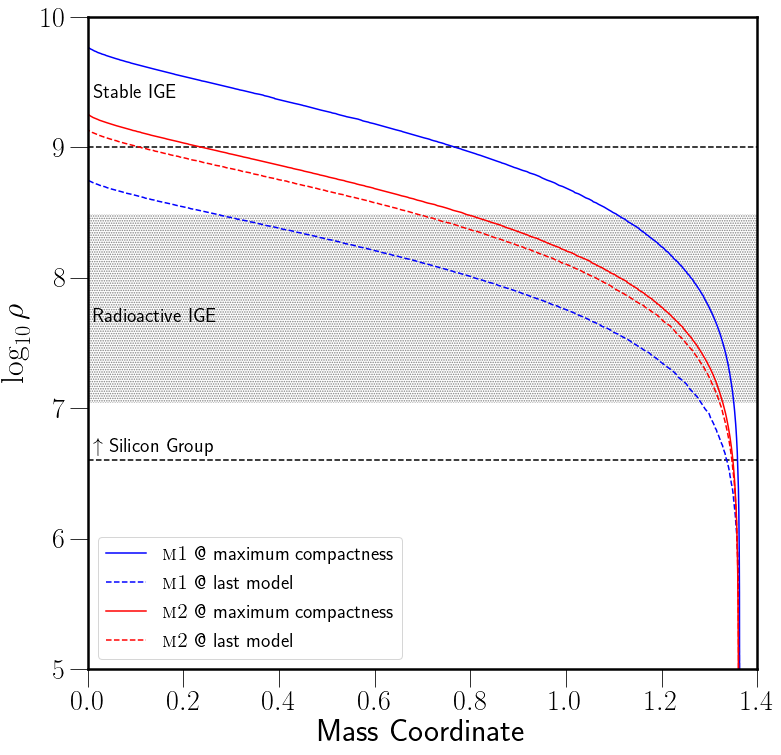

In [723]:
profiles = [mr.MesaData(os.path.join(work_dir,'results/paper/2.5_0.02_0.0_maxRho_profile.data')).data,
            mr.MesaData(os.path.join(work_dir,'results/paper/2.5_0.02_0.0_final_profile.data')).data,
            mr.MesaData(os.path.join(work_dir,'results/paper/1.8_0.02_0.014_maxRho_profile.data')).data,
            mr.MesaData(os.path.join(work_dir,'results/paper/1.8_0.02_0.014_final_profile.data')).data]


def mass_average(profile,quantity='o16'):
    mass = profile('dq')*profile('mass')[0]
    
    return (profile(quantity)*mass).sum()/mass.sum()


def nucleosynthesis():
    plt.rcParams['figure.figsize'] = [12, 12]
    plt.xlabel(r'Mass Coordinate')
    plt.ylabel(r'$\log_{10} \rho$')
    m = np.arange(0.0,1.5,0.1)
    rho  = np.arange(0,11.,0.01)
    

    
    plt.plot(m,np.ones_like(m)*9.0,ls='--',color='black')
    plt.text(0.01, 9.42, r'Stable IGE ', 
             {'color': 'black', 'ha': 'left', 'va': 'center','fontsize': 20})
    
    
    plt.text(0.01, 7.7, r'Radioactive IGE', 
             {'color': 'black', 'ha': 'left', 'va': 'center','fontsize': 20})
    
    
    
    plt.plot(m,np.ones_like(m)*6.6,ls='--',color='black')
    plt.text(0.01, 6.7, r'$\uparrow$ Silicon Group', 
             {'color': 'black', 'ha': 'left', 'va': 'center','fontsize': 20})
    plt.fill_between(m,7.04,8.49,facecolor="none", hatch=".....", edgecolor="gray", linewidth=0.0)
    
    plt.plot(profiles[0]('mass'),profiles[0]('logRho'),color='blue',ls='-',label=r'$\textsc{m1}$ @ maximum compactness')
    plt.plot(profiles[1]('mass'),profiles[1]('logRho'),color='blue',ls='--',label=r'$\textsc{m1}$ @ last model')
    plt.plot(profiles[2]('mass'),profiles[2]('logRho'),color='red',ls='-',label=r'$\textsc{m2}$ @ maximum compactness')
    plt.plot(profiles[3]('mass'),profiles[3]('logRho'),color='red',ls='--',label=r'$\textsc{m2}$ @ last model')
    plt.ylim([5,10.0])
    plt.xlim([0.0,1.4])
    plt.legend(prop={'size': 22},loc='lower left')
    plt.savefig(os.path.join(plot_results_dir,'composition.pdf'))
#prepare_canvas()    
nucleosynthesis()

for p in profiles:
    print(mass_average(p,quantity='c12'),p('c12')[-1],p('o16')[-1],p('ne20')[-1],mass_average(p,quantity='na23'),mass_average(p,quantity='mg24'),mass_average(p,quantity='mg25'),mass_average(p,quantity='ye'))
    



### kinetic_energy(profiles[0],0.6,0.6,Xfe=0.1)
kinetic_energy(profiles[2],0.7,0.6,Xfe=0.1)